<a href="https://colab.research.google.com/github/GriffsKode/griffskode.github.io/blob/main/portfolio/clustering/Airline_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Start by loading the following data into a pandas Dataframe. This data will represent Airline Customer accounts with the first column being how many months the account has been active and the second column being the Account balanced measured in points. Start by displaying the head of the dataframe.  

In [11]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore", category=FutureWarning)

# create data
data = pd.DataFrame([[60,41000],
[61,46000],
[62,49000],
[63,39000],
[62,45000],
[61,50000],
[60,46000],
[50,76000],
[57,82000],
[60,58000],
[55,80000],
[54,81000],
[57,84000],
[53,81000],
[32,90000],
[36,86000],
[39,90000],
[31,91000],
[37,85000],
[39,88000]],
    columns=['AccountAge', 'CurrentMileageBalance'])
data.head()

,AccountAge,CurrentMileageBalance
0,60,41000
1,61,46000
2,62,49000
3,63,39000
4,62,45000


###### Next, show the distribution of the acount age and balance using Seaborn's distplot function. Hint: plot each column of data.

<ipython-input-12-17354dca32f0>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




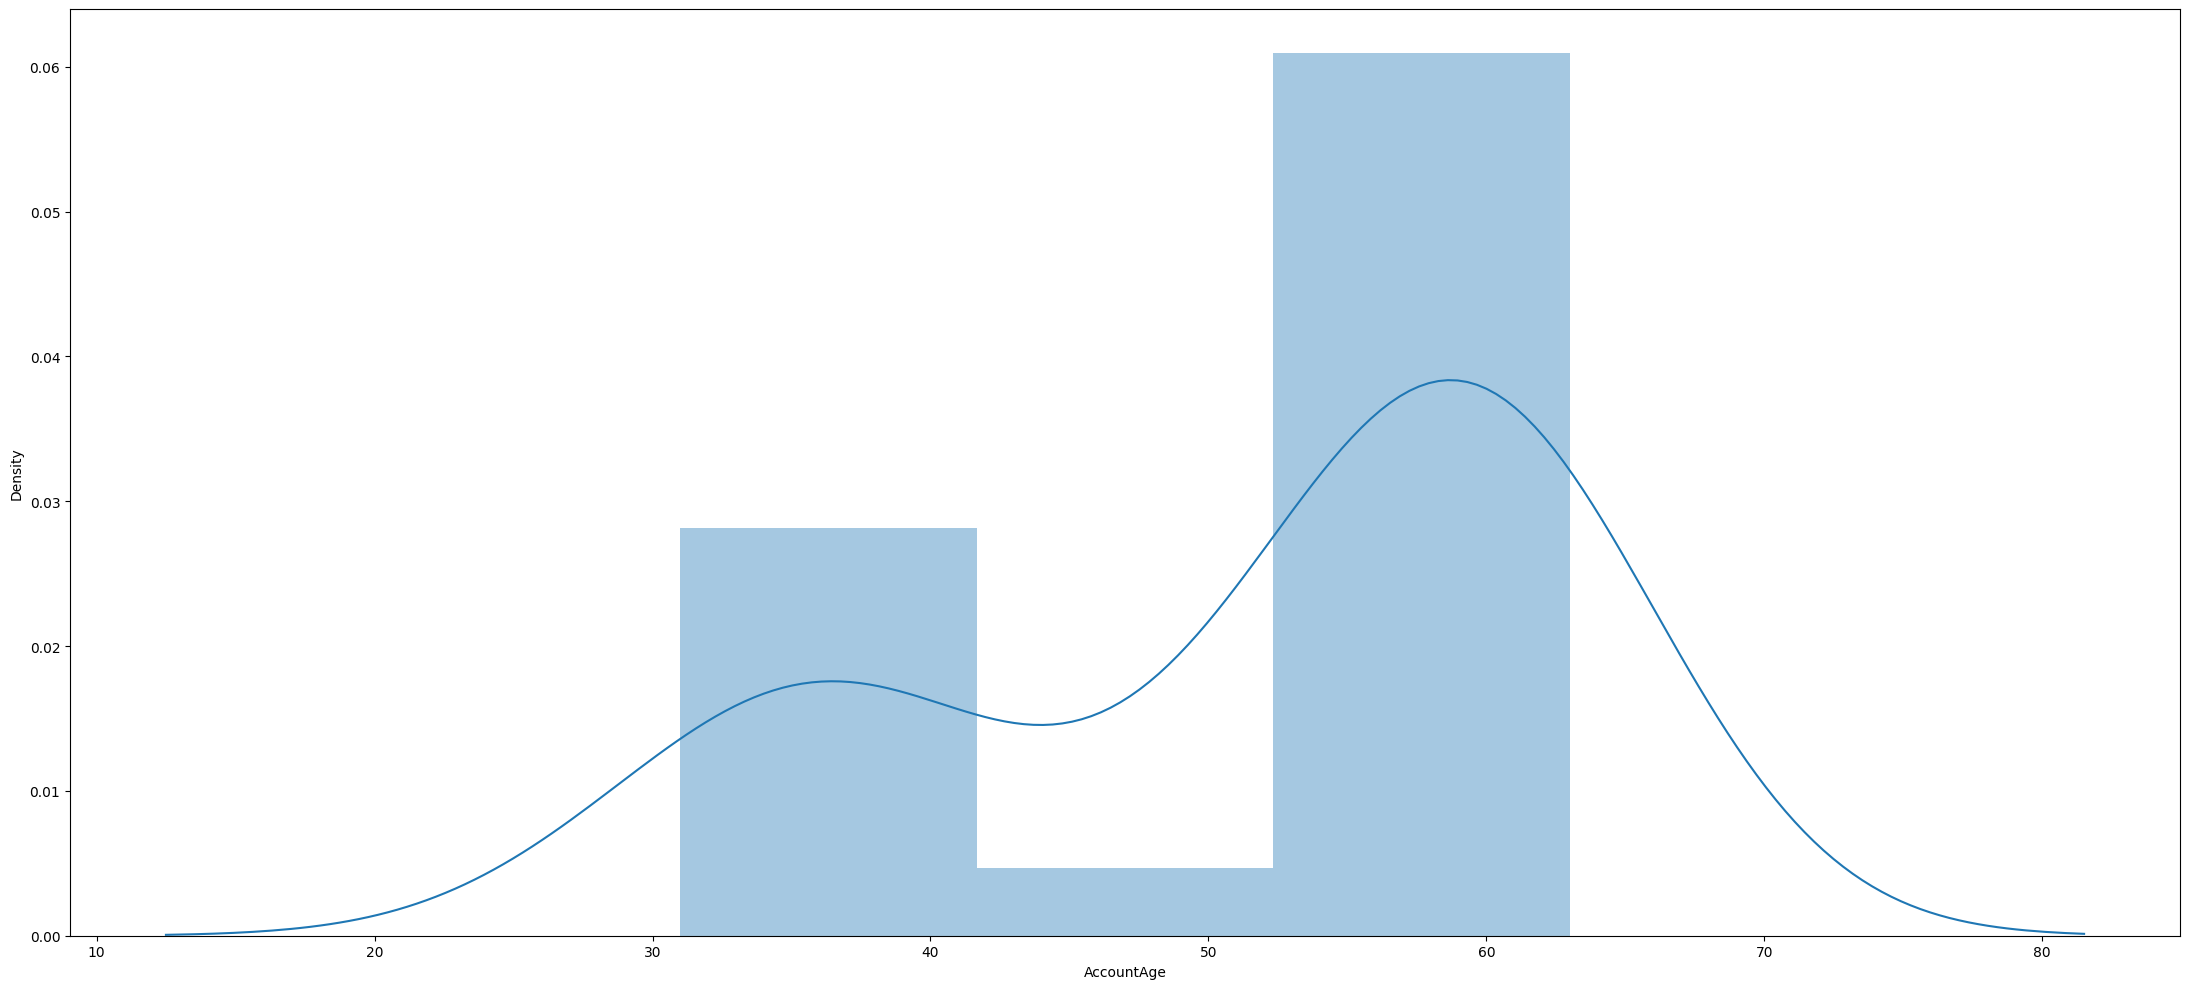

<ipython-input-12-17354dca32f0>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




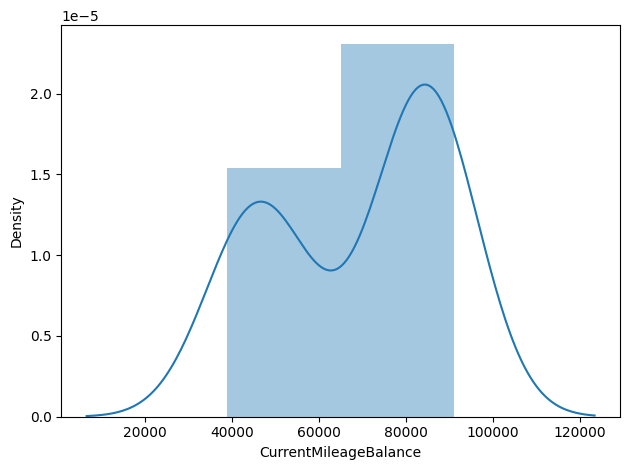

In [12]:
plot.figure(figsize = (22, 10))
plotnum = 1

#https://seaborn.pydata.org/generated/seaborn.displot.html referenced
accountAge = sns.distplot(data['AccountAge']).get_lines()[0].get_data()
plot.tight_layout()
plot.show()

mileageCoords = sns.distplot(data['CurrentMileageBalance']).get_lines()[0].get_data()

plot.tight_layout()
plot.show()

###### Next, create a bar graph to show the distribution of account ages given the provided ranges.

In [13]:
# Create the following variables:
# time_above_71, time_56_70, time_41_55, time_26_40, and time_0_25
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html pandas loc referenced material.
# create data
import pandas as pd
import plotly.express as pxp
data = pd.DataFrame([[60,41000],
[61,46000],
[62,49000],
[63,39000],
[62,45000],
[61,50000],
[60,46000],
[50,76000],
[57,82000],
[60,58000],
[55,80000],
[54,81000],
[57,84000],
[53,81000],
[32,90000],
[36,86000],
[39,90000],
[31,91000],
[37,85000],
[39,88000]],
    columns=['AccountAge', 'CurrentMileageBalance'])
time_above_71 = data.AccountAge[data.AccountAge >=71]
time_56_70 = data.AccountAge[(data.AccountAge >=56) & (data.AccountAge <=70)]
time_41_55 = data.AccountAge[(data.AccountAge >=41) & (data.AccountAge <=55)]
time_26_40 = data.AccountAge[(data.AccountAge >=26) & (data.AccountAge <=40)]
time_0_25 = data.AccountAge[data.AccountAge <=25]
#time_above_71 = data.loc[data['AccountAge'] >=71]
#time_56_70 = data.loc[(data['AccountAge'] >=56) & (data['AccountAge'] <=70)]
#time_41_55 = data.loc[(data['AccountAge'] >=41) & (data['AccountAge'] <=55)]
#time_26_40 = data.loc[(data['AccountAge'] >=26) & (data['AccountAge'] <=40)]
#time_0_25 = data.loc[data['AccountAge'] <=25]


#Plotting the graph.

x_age_ax = ['0-25', '26-40', '41-55', '56-70', '71+']
y_age_ax = [len(time_0_25.values), len(time_26_40.values), len(time_41_55.values),
            len(time_56_70.values), len(time_above_71.values)]

pxp.bar(data_frame = data, x = x_age_ax, y = y_age_ax, color = x_age_ax,
       title = 'Count of Accounts by Age (Months)')

###### Next, use the elbow method to visualize desired K value. Hint: check K in range 1 through 12. Set random_state=0.

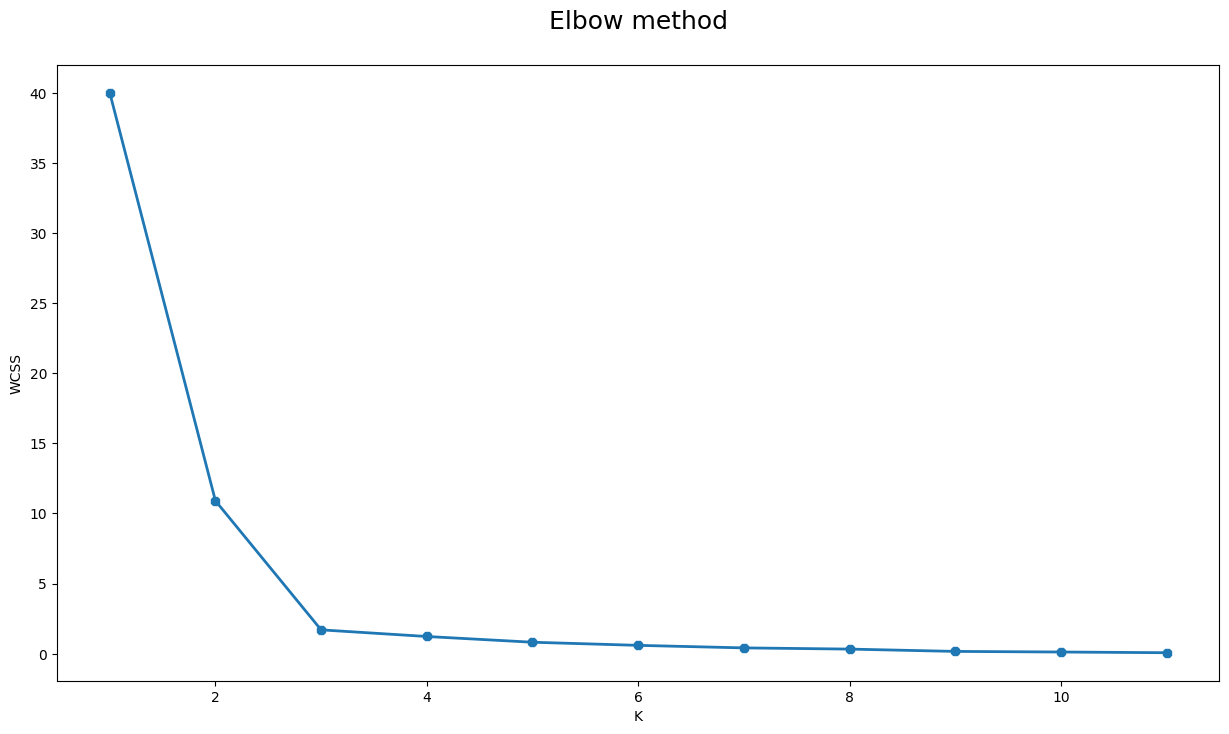

In [14]:
x_input = data.loc[:, ['AccountAge', 'CurrentMileageBalance']].values

# set random_state=0 in KMeans()
#Python code referenced: https://realpython.com/k-means-clustering-python/
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster also referenced

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 0,
}

wcss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


# Plotting Graph
plot.figure(figsize=(15,8))

plot.plot(range(1, 12), wcss, linewidth=2, marker='8')
plot.title('Elbow method\n', fontsize=18)
plot.xlabel('K')
plot.ylabel('WCSS')
ax = plot.gca() # get axis handle
line = ax.get_lines()[0]
xydata = line.get_xydata()
plot.show()


###### Display the matrix which holds the cluster center coordinate points.

In [15]:

from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3, random_state=0)
labels=k_means.fit_predict(x_input)

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster referenced
k_means.fit(scaled_features)
clusterCenters = k_means.cluster_centers_
print(k_means.cluster_centers_)

#
ClusterCenters = k_means.cluster_centers_

[[ 0.26337853  0.58888592]
 [-1.44173101  0.98960711]
 [ 0.88376436 -1.18386978]]


###### Now display the Cluster graph

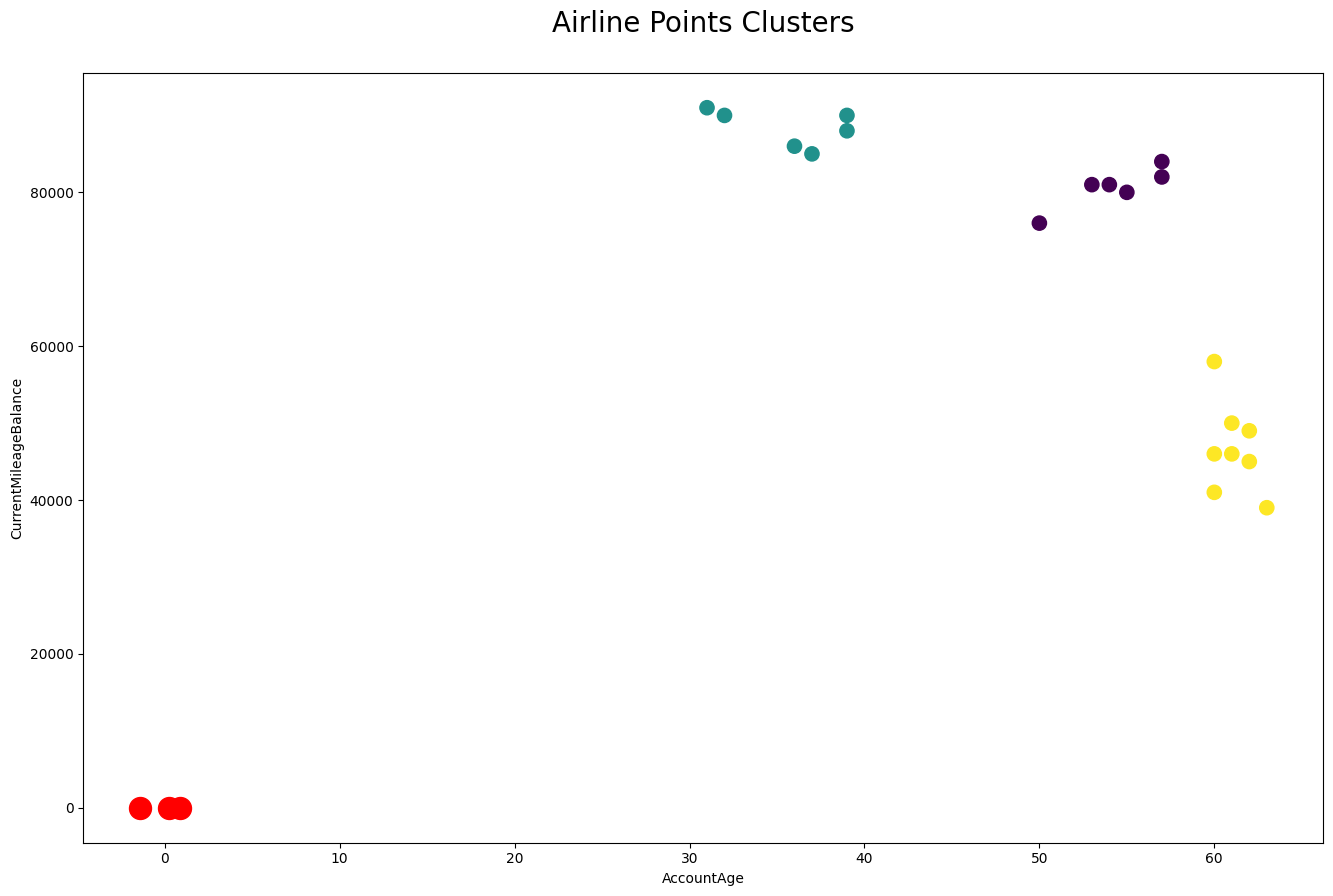

[[60.0 41000.0]
 [61.0 46000.0]
 [62.0 49000.0]
 [63.0 39000.0]
 [62.0 45000.0]
 [61.0 50000.0]
 [60.0 46000.0]
 [50.0 76000.0]
 [57.0 82000.0]
 [60.0 58000.0]
 [55.0 80000.0]
 [54.0 81000.0]
 [57.0 84000.0]
 [53.0 81000.0]
 [32.0 90000.0]
 [36.0 86000.0]
 [39.0 90000.0]
 [31.0 91000.0]
 [37.0 85000.0]
 [39.0 88000.0]]


In [16]:
import matplotlib.pyplot as plot

plot.figure(figsize = (16, 10))

# Display Cluster Graph
plot.scatter(x_input[:, 0], x_input[:,1], c = k_means.labels_, s = 105)
plot.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1] , color = 'red', s = 250)

#Plotting
plot.title('Airline Points Clusters\n', fontsize = 20)
plot.xlabel('AccountAge')
plot.ylabel('CurrentMileageBalance')

# Get the current figure object
current_figure = plot.gcf()

# Get the scatter plot objects from the figure
scatter_plots = current_figure.axes[0].collections

# Assuming you want the points from the first scatter plot
points = scatter_plots[0].get_offsets()

plot.show()

print(points)
